In [1]:
from sympy import *
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

In [2]:
#Cool Printing
init_printing()

In [3]:
#Defining Variables
J_1,J_2,omega,x_1,x_2,mu, rho_1,rho_2,A_1,A_2=symbols("J_1 J_2 omega x_1 x_2 mu rho_1 rho_2 \
                                                A_1,A_2", real=True)
rhoA1,rhoA2=symbols("rhoA1 rhoA2", real=True)
omega=(1+2*(A_1+A_2)+3*(J_1+J_2))

In [4]:
poly_rho1=omega*rhoA1**5-rhoA1**2-3*J_1-2*A_1*rhoA1
poly_rho2=omega*rhoA2**5-rhoA2**2-3*J_2-2*A_2*rhoA2

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
supercount=1

In [6]:
rho_1, rho_2=sqrt((x_1+mu)**2+x_2**2),sqrt((x_1+mu-1)**2+x_2**2)
U=-(1-mu)*(1/rho_1+A_1/rho_1**2+J_1/rho_1**3)-mu*(1/rho_2+A_2/rho_2**2+J_2/rho_2**3)
U11=diff(U,x_1,x_1)
U22=diff(U,x_2,x_2)
U12=diff(U,x_1,x_2)

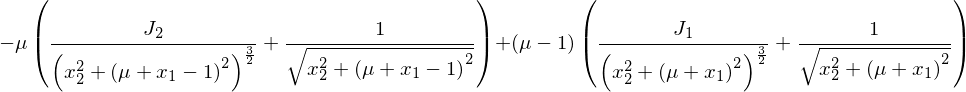

In [7]:
#Give values to A_1, A_2
U=U.subs(A_1,0).subs(A_2,0)
U11=U11.subs(A_1,0).subs(A_2,0)
U22=U22.subs(A_1,0).subs(A_2,0)
U12=U12.subs(A_1,0).subs(A_2,0)
poly_rho1=poly_rho1.subs(A_1,0).subs(A_2,0)
poly_rho2=poly_rho2.subs(A_2,0).subs(A_1,0)
omega=omega.subs(A_1,0).subs(A_2,0)
U

In [8]:
slope_list=np.tan(np.linspace(0,np.pi/2.,5, endpoint=False))

for m in slope_list:
    set_of_mu=[]
    count=0
    for t in np.linspace(0, 1./(3*(m+1)),10):        
        j1=m*t
        poly1_subs=poly_rho1.subs(J_1,j1).subs(J_2,t)
        poly2_subs=poly_rho2.subs(J_1,j1).subs(J_2,t)
        
        rho1_value=solve(poly1_subs,rhoA1)[-1]  
        rho2_value=solve(poly2_subs,rhoA2)[-1]
        
        x_1_replace=solve(sqrt((x_1+mu)**2+x_2**2)-rho1_value,x_1)
        #print(x_1_replace)
        x2_value= solve(sqrt((x_1_replace[-1]+mu-1)**2+x_2**2)-rho2_value,x_2)
        x2_value=x2_value[-1]
        x1_value=x_1_replace[-1].subs(x_2,x2_value)
        #print(x2_value, x1_value)
        #print("Step1")
        
        omega_value=omega.subs(J_1,j1).subs(J_2,t)
        
        U11_value=U11.subs(x_1,x1_value).subs(x_2,x2_value).subs(J_1,j1).subs(J_2,t)
        U22_value=U22.subs(x_1,x1_value).subs(x_2,x2_value).subs(J_1,j1).subs(J_2,t)
        U12_value=U12.subs(x_1,x1_value).subs(x_2,x2_value).subs(J_1,j1).subs(J_2,t)
        
        #mu1=solve((U11_value+U22_value-2*omega_value)**2-4*(U12_value-\
                 # U11_value*U22_value-omega_value*(U11_value+U22_value)-\
                  #omega_value**2),mu)
        #mu2=solve(U11_value+U22_value-2*omega_value ,mu)
        phi_11=omega_value+(1-mu)*(3*(x1_value+mu)**2-rho1_value**2)/rho1_value**5+\
        mu*(3*(x1_value+mu-1)**2-rho2_value**2)/rho2_value**5+3*(1-mu)*j1*\
        (5*(x1_value+mu)**2-rho1_value**2)/rho1_value**7+\
        3*mu*t*(5*(x1_value+mu-1)**2-rho2_value**2)/rho2_value**7
        
        phi_12=3*x2_value*( (1-mu)*(x1_value+mu)/rho1_value**5+mu*(x1_value+mu-1)/rho2_value\
                          **5+5*(1-mu)*j1*(x1_value+mu)/rho1_value**7+\
                          5*mu*t*(x1_value+mu-1)/rho2_value**7)
        
        phi_22=omega_value+(1-mu)*(3*x2_value**2-rho1_value**2)/rho1_value**5+mu*(3\
                *x2_value**2-rho2_value**2)/rho2_value**5+3*(1-mu)*j1*\
        (5*x2_value**2-rho1_value**2)/rho1_value**7+3*mu*t*(5*x2_value**2-rho2_value**2)/\
        rho2_value**7
        
        mu1=solve((4*omega_value-phi_11-phi_22)**2-4*(phi_11*phi_22-phi_12**2),mu)
        mu2=solve(4*omega_value-phi_11-phi_22 ,mu)
        
        print(mu1,mu2)
        #print("Step3")
        mu_result=min(ii for ii in mu1+mu2 if ii>0)
        set_of_mu.append(mu_result)
        count+=1
        print("Finished %i/10, iteration %i/5. Value: %f"%(count,supercount,mu_result))
    ax.plot(np.linspace(0, 1./(3*(m+1)),10)*m,np.linspace(0, 1./(3*(m+1)),10),set_of_mu,"b")    
    supercount+=1
ax.set_xlabel("J1")
ax.set_ylabel("J2")
ax.set_zlabel("mu_{crit}")

[-sqrt(69)/18 + 1/2, sqrt(69)/18 + 1/2] []
Finished 1/10, iteration 1/5. Value: 0.038521
[0.0346882902015112, 0.977518753307666] [5.00000000000000]
Finished 2/10, iteration 1/5. Value: 0.034688
[0.0319998202272180, 0.986789857955227] [2.75000000000000]
Finished 3/10, iteration 1/5. Value: 0.032000
[0.0300077657551730, 0.992325333873680] [2.00000000000000]
Finished 4/10, iteration 1/5. Value: 0.030008
[0.0284713820330458, 0.995683541366951] [1.62500000000000]
Finished 5/10, iteration 1/5. Value: 0.028471
[0.0272495803336136, 0.997718448347737] [1.40000000000000]
Finished 6/10, iteration 1/5. Value: 0.027250
[0.0262541579864692, 0.998922680939930] [1.25000000000000]
Finished 7/10, iteration 1/5. Value: 0.026254
[0.0254271233877032, 0.999592501583175] [1.14285714285714]
Finished 8/10, iteration 1/5. Value: 0.025427
[0.0247287718074390, 0.999912271401702] [1.06250000000000]
Finished 9/10, iteration 1/5. Value: 0.024729
[0.0241309982898378, 1.00000000000000] [1.00000000000000]
Finished 10/1

Text(0.5,0,'mu_{crit}')

In [9]:
plt.show()